In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set()
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from xgboost import XGBRegressor

In [2]:
import warnings
import sys
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [3]:
df = pd.read_csv('/content/Churn.csv')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [5]:
df.duplicated().sum()

0

In [6]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df['Churn'].value_counts()


No     5174
Yes    1869
Name: Churn, dtype: int64

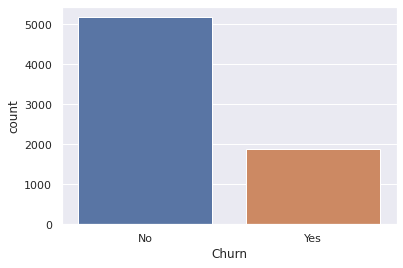

In [8]:
sns.countplot(df['Churn'])

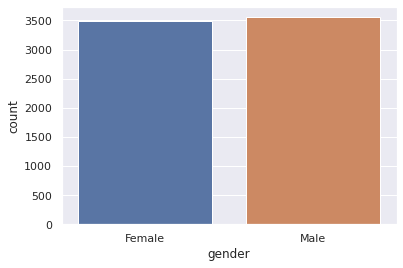

In [9]:
sns.countplot(df['gender'])

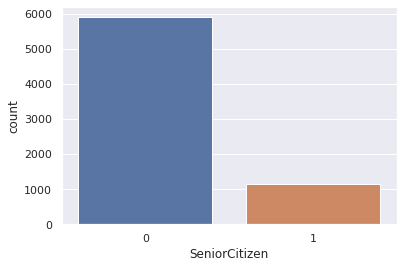

In [10]:
sns.countplot(df['SeniorCitizen'])

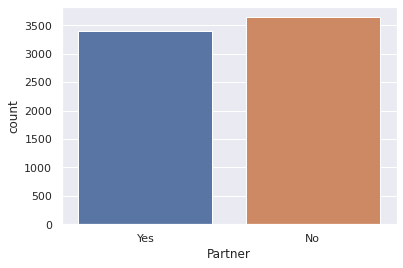

In [11]:
sns.countplot(df['Partner'])

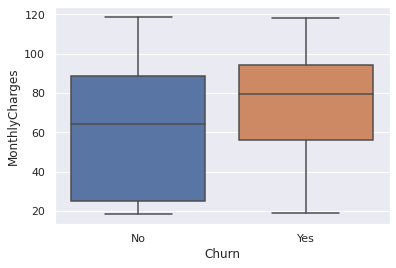

In [12]:
#valor mensal do churn
sns.boxplot('Churn', 'MonthlyCharges',data=df)




In [13]:
#summary
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [14]:
#Pré-Processaemnto dos dados
df.drop(['customerID'], axis=1,inplace=True)

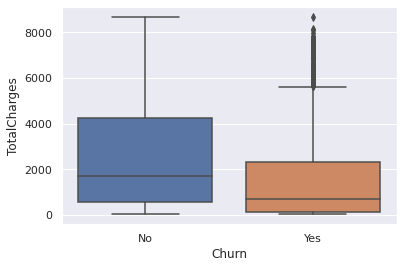

In [15]:
#Converter variáveis Strings para numéricas
df['TotalCharges'] = df['TotalCharges'].replace('',np.nan)
df.isna().sum()
df.dropna(inplace=True)

df["TotalCharges"] = pd.to_numeric(df['TotalCharges'],errors='coerce')


sns.boxplot('Churn', 'TotalCharges', data=df)

In [16]:
#Converter a label Yes/No from ONE or Ziro For Churn
df['Churn'].replace('Yes', 1, inplace=True)
df['Churn'].replace('No', 0, inplace=True)

#Converter a label Yes/No from ONE or Ziro For SeniorCitizen
df['SeniorCitizen'].replace('Yes', 1, inplace=True)
df['SeniorCitizen'].replace('No', 0, inplace=True)

#Encode em outras variáveis
df_onehot = pd.get_dummies(df)

df_onehot.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0


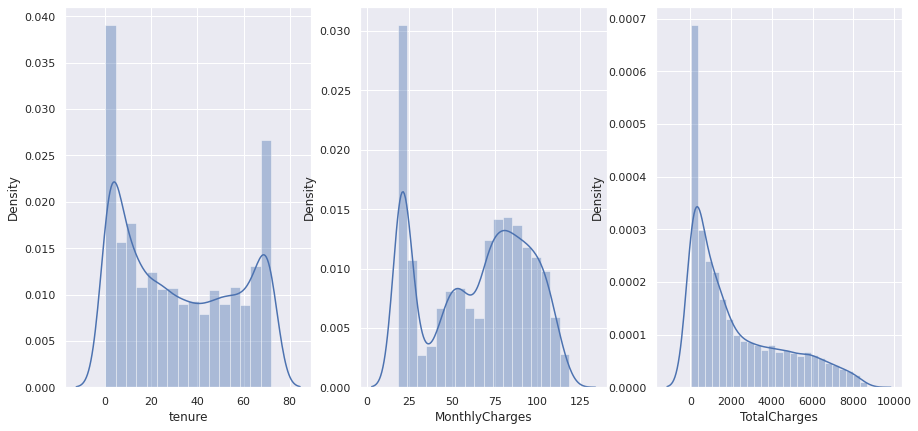

In [17]:
#visualizar distribuições
f, ax = plt.subplots(1,3, figsize=(15,7))

sns.distplot(df_onehot['tenure'], ax=ax[0])
sns.distplot(df_onehot['MonthlyCharges'], ax=ax[1])
sns.distplot(df_onehot['TotalCharges'], ax=ax[2])

In [18]:
#Scale
scaler = MinMaxScaler()
df_onehot['tenure'] = scaler.fit_transform(df_onehot['tenure'].values.reshape(-1, 1))
df_onehot['MonthlyCharges'] = scaler.fit_transform(df_onehot['MonthlyCharges'].values.reshape(-1, 1))
df_onehot['TotalCharges'] = scaler.fit_transform(df_onehot['TotalCharges'].values.reshape(-1, 1))

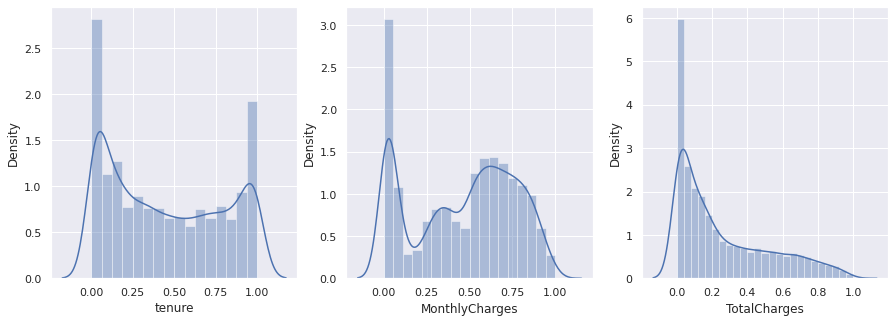

In [19]:
# Visualise distribuição depois
f, ax = plt.subplots(1,3, figsize=(15,5))

sns.distplot(df_onehot['tenure'], ax=ax[0])
sns.distplot(df_onehot['MonthlyCharges'], ax=ax[1])
sns.distplot(df_onehot['TotalCharges'], ax=ax[2])

In [20]:
# Separação Treino e Teste

X = df_onehot.drop(['Churn'], axis=1)
y = df_onehot['Churn'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [21]:
np.any(np.isnan(df_onehot))

True

In [22]:
np.all(np.isfinite(df_onehot))

False

In [23]:
X_train = X_train.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

In [24]:
X_test = X_test.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

In [25]:
#modelos
#Baseline

model = LogisticRegression()
model.fit(X_train, y_train)

y_predict = model.predict(X_test)
actual_vs_predict = pd.DataFrame({'Actual': y_test.flatten(),
                                 'Prediction': y_predict.flatten()})
print(actual_vs_predict.sample(12))

      Actual  Prediction
558        0           0
900        0           0
233        1           1
147        0           0
1169       0           0
587        1           0
638        1           1
458        1           0
1253       0           0
872        0           1
591        0           0
163        0           0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ROC AUC: 72.96 %


Text(0, 0.5, 'True Positive Rate')

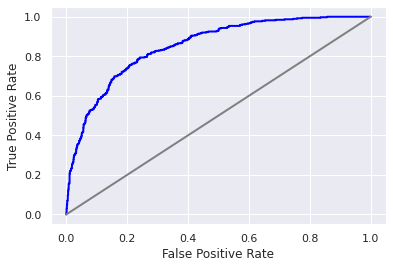

In [26]:
#Avaliação da Baseline

# Evaluate model
print('ROC AUC: %.2f' % (roc_auc_score(y_test,y_predict)*100), '%')

# Visualise ROC
y_probs = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr, lw=2, color='blue')
plt.plot([0,1], [0,1], lw=2, color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')


In [27]:
#Batendo o Baseline com GBM - Gradient Boosting
# Build and train model
model = GradientBoostingClassifier (learning_rate=0.1,max_depth=2,n_estimators=200,max_features=8,random_state=42)
model.fit(X_train, y_train)

# Apply model
y_predict = model.predict(X_test)
actual_vs_predict = pd.DataFrame({'Actual': y_test.flatten(),
                                 'Prediction': y_predict.flatten()})
print(actual_vs_predict.sample(12))


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


      Actual  Prediction
1055       1           0
134        0           1
904        1           1
1140       0           0
712        0           0
713        0           0
1031       0           1
1396       0           0
1229       0           1
1067       1           0
491        0           0
455        0           0


ROC AUC: 72.80 %


Text(0, 0.5, 'True Positive Rate')

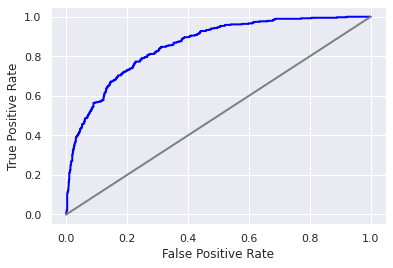

In [28]:
# Evaluate model
print('ROC AUC: %.2f' % (roc_auc_score(y_test,y_predict)*100), '%')

# Visualise ROC
y_probs = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr, lw=2, color='blue')
plt.plot([0,1], [0,1], lw=2, color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [29]:
#Batendo o Baseline com XGBoost - eXtreme Gradient Boosting
# Build and train model
model = XGBClassifier (max_depth=3, learning_rate=0.1, n_estimators=200, booster='gblinear')
model.fit(X_train, y_train)

# Apply model
y_predict = model.predict(X_test)
actual_vs_predict = pd.DataFrame({'Actual': y_test.flatten(),
                                 'Prediction': y_predict.flatten()})
print(actual_vs_predict.sample(12))


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


      Actual  Prediction
518        0           0
825        0           0
455        0           0
1066       0           0
146        1           0
498        0           0
788        0           0
766        0           0
1195       0           0
582        0           0
127        1           0
102        1           0


ROC AUC: 50.00 %


Text(0, 0.5, 'True Positive Rate')

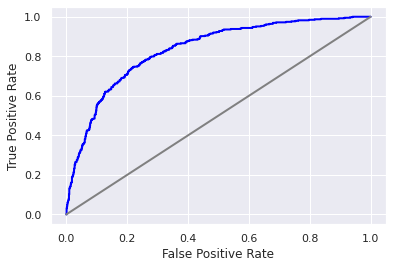

In [30]:
# Evaluate model
print('ROC AUC: %.2f' % (roc_auc_score(y_test,y_predict)*100), '%')

# Visualise ROC
y_probs = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr, lw=2, color='blue')
plt.plot([0,1], [0,1], lw=2, color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

AxesSubplot(0.125,0.125;0.775x0.755)


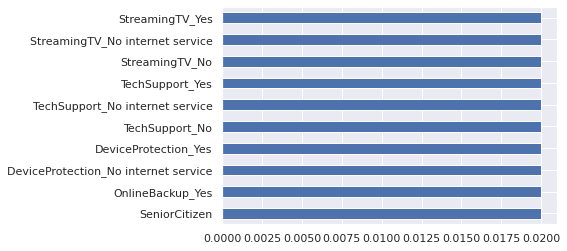

In [31]:
# Top ten features with positive relationship to churn
weights = pd.Series(model.coef_[0], index=X.columns.values)
print(weights.sort_values(ascending=False )[:10].plot(kind='barh'))

AxesSubplot(0.125,0.125;0.775x0.755)


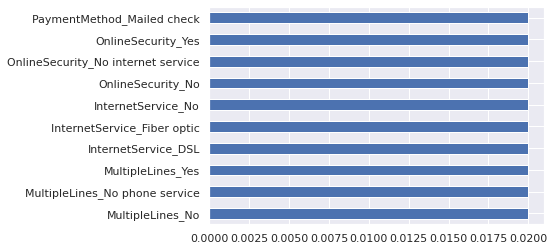

In [32]:
# Top ten features with negative relationship to churn
weights = pd.Series(model.coef_[0], index=X.columns.values)
print(weights.sort_values(ascending=False)[-10:].plot(kind='barh'))

#Clientes que tendem a sair

*   A probabilidade de um cliente sair no próximo mês ou mais com ROC AUC de 72%
*   Não tem assinatura de techsupport
*   São idosos

